In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import (metrics, linear_model, preprocessing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.mode.chained_assignment = None
path = 'credit_card_defaults(UCI).xls'
pdexcel = pd.ExcelFile(path)
print(pdexcel.sheet_names)
df = pdexcel.parse('Data' , skiprows = 1)


['Data']


In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
print('Default Data - rows:' , df.shape[0],'columns:', df.shape[1])

Default Data - rows: 30000 columns: 25


In [5]:
df1 = df[:]

In [6]:
df = df1[:]

# <a id = '7'>EDA<a/>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# <a id = '7'>Check Missing Data<a/>

In [8]:
missingInfo = list(df.columns[df.isnull().any()])
missingInfo

[]

In [9]:
for col in missingInfo:
    missingNumber = df[df[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))
else :
    print(f'Data is clean , data has no missing values in columns')

Data is clean , data has no missing values in columns


In [10]:
# Check for duplicates
df.duplicated(keep=False).sum()

0

# <a id = '7'>Visualise the entire dataframe with boxplots and Stats<a/>

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


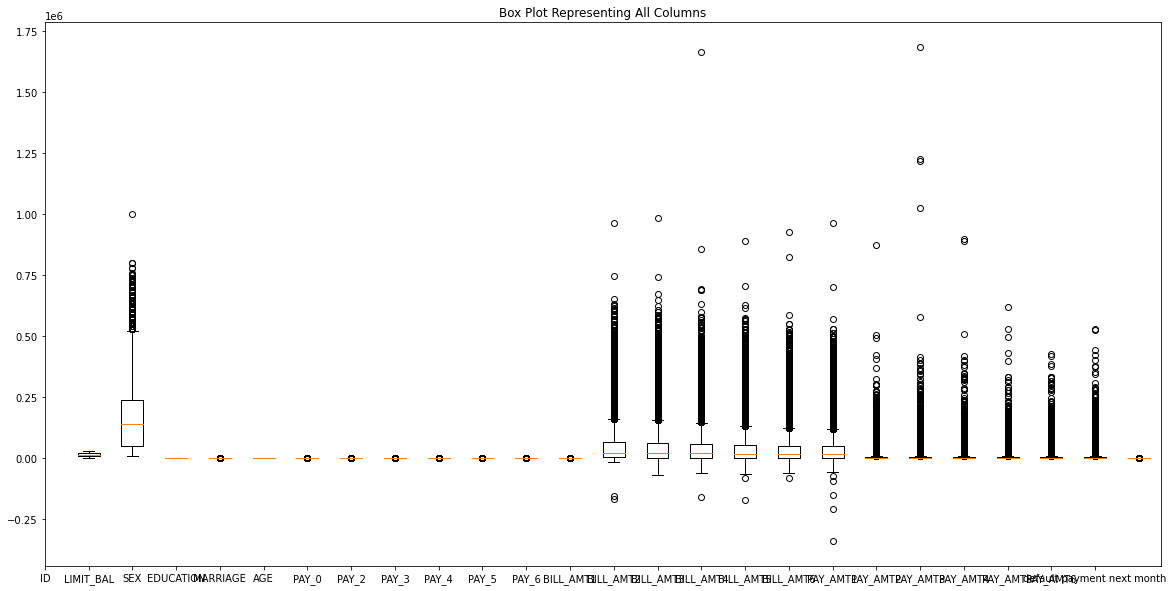

In [11]:
display(df.describe())

"""Create a box plot for each column"""
plt.figure(figsize=(20,10))
plt.boxplot([df[col] for col in df.columns])
plt.title('Box Plot Representing All Columns')
plt.xticks(range(len(df.columns.values)) , df.columns.values)
plt.show()

### [Observations](#0)

- 30000 transactions were made between April and September

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# tidying up columns since 

In [14]:
df.columns = df.columns.map(lambda x : x.replace(" ",'_'))

In [15]:
# Dropping the ID column
# df.drop('ID' , 1 , inplace = True)

# <a id = '7'>Checking for Categorical and numerical columns<a/>

In [16]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_cols

[]

In [17]:
# Note : Data has no categorical columns

In [18]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month']

# <a id = '7'>Heatmap<a/>

In [19]:
target = 'default_payment_next_month'

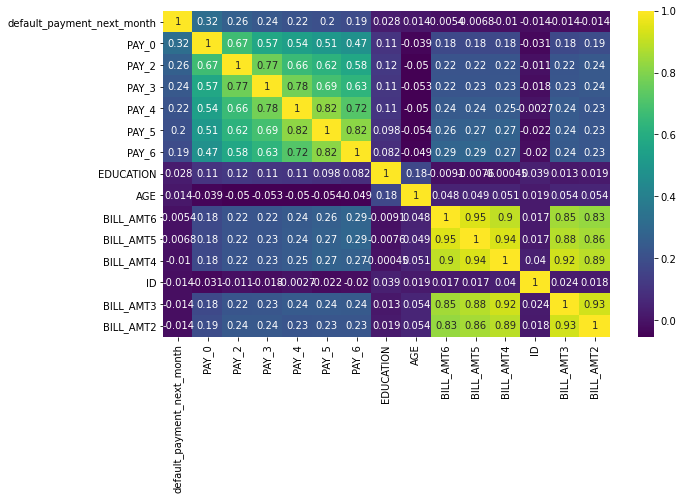

In [20]:
k = 15
cols = df[num_cols].corr().nlargest(k , target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cm , annot=True , cmap='viridis')
plt.show()

In [21]:
# Remaning the target columns as default for short
df.rename(columns = {'default_payment_next_month' : 'default'} , inplace = True)

# <a id = '7'>Feature Density Plot<a/>

<Figure size 432x288 with 0 Axes>

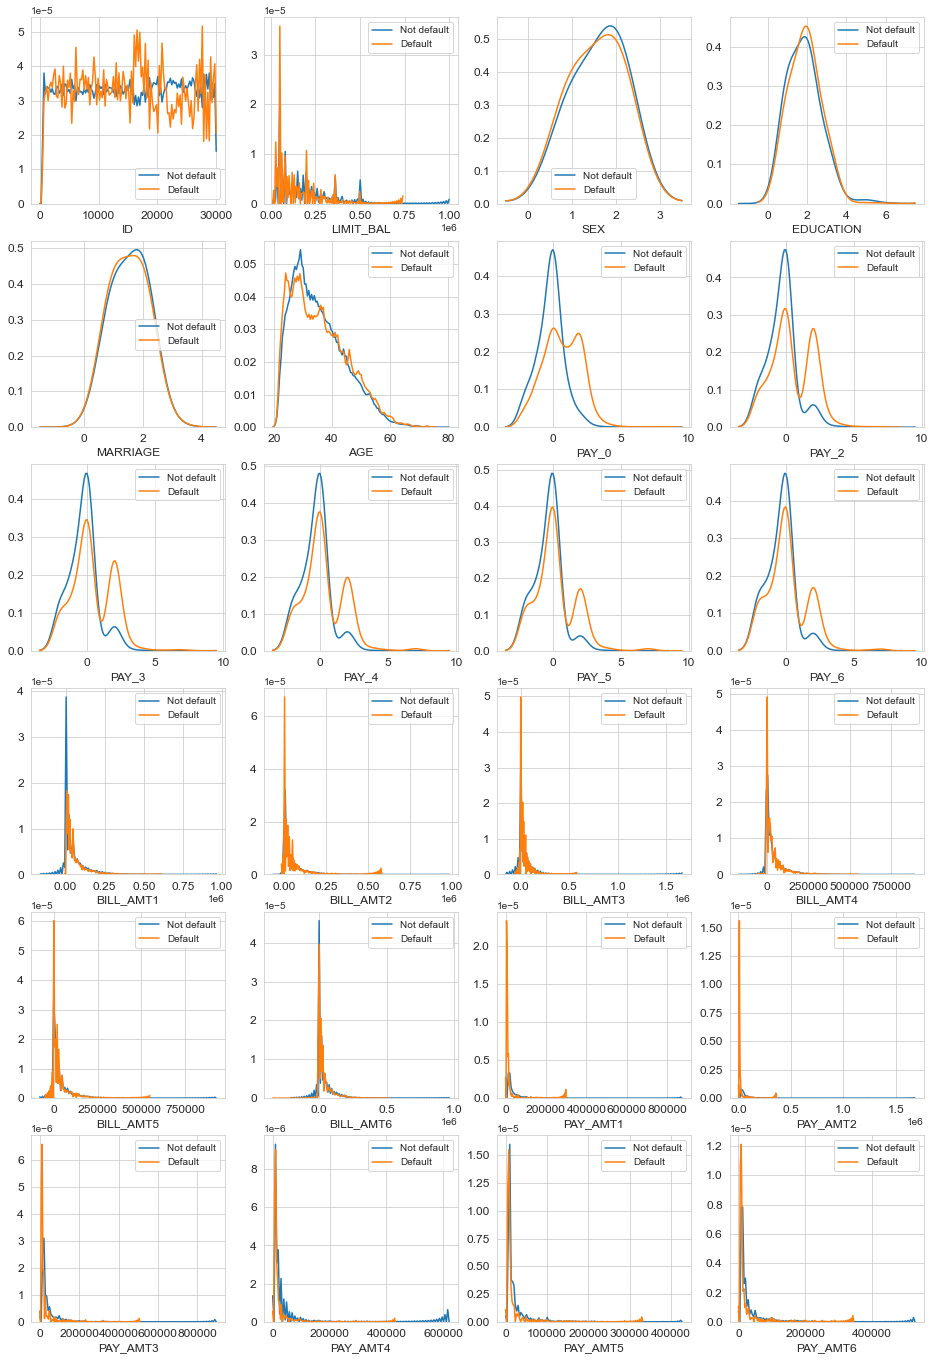

In [39]:

features = [f for f in df.columns if f not in ['default']]
target = [x for x in df['default']]

i = 0
t0 = df[df['default'] == 0]
t1 = df[df['default'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Not default")
    sns.kdeplot(t1[feature], bw=0.5,label="Default")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

<Figure size 432x288 with 0 Axes>

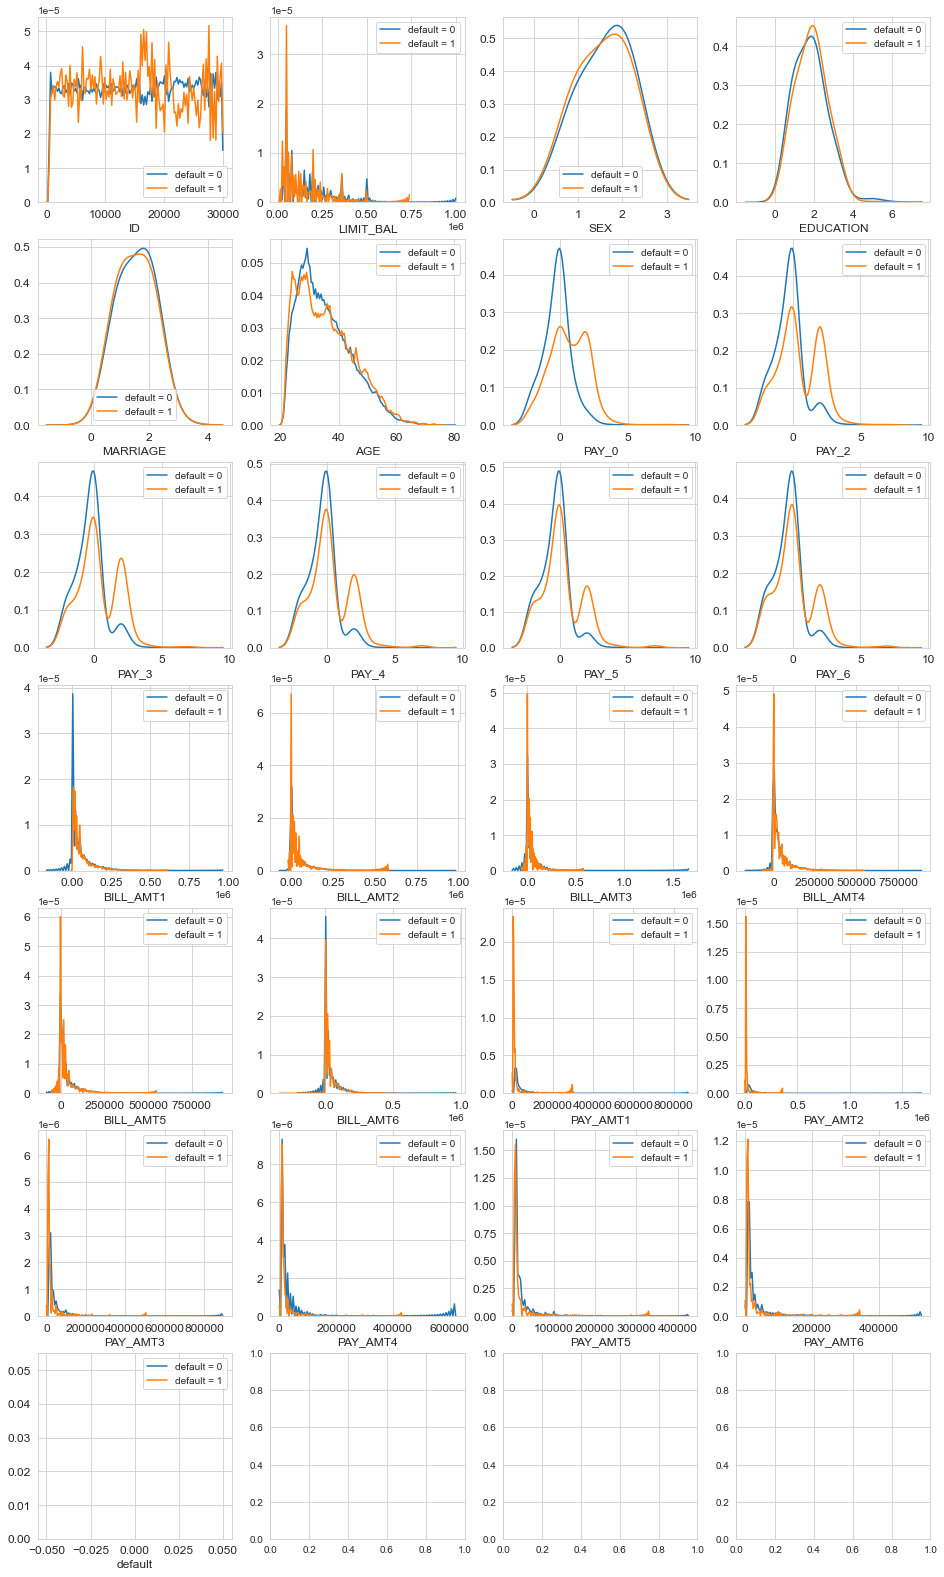

In [40]:
var = df.columns.values

i = 0
t0 = df.loc[df['default'] == 0]
t1 = df.loc[df['default'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label='default = 0')
    sns.kdeplot(t1[feature], bw=0.5, label='default = 1')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both' , which='major', labelsize=12)
plt.show();

In [41]:
# Lets have a look at the part of the DataFrame where there are only defaults

not_default = df[df["default"] == 0]
default= df[df["default"] == 1]

In [42]:
default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Visualizations

# <a id = '7'>Amount of Credit limit<a/>

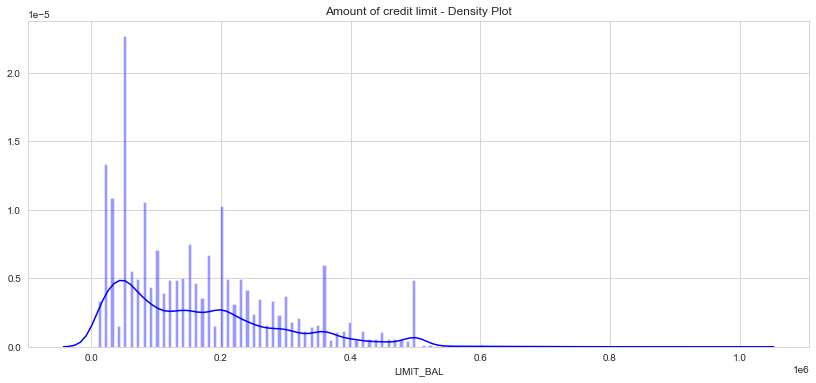

In [45]:
plt.figure(figsize = (14 ,6))
plt.title("Amount of credit limit - Density Plot")
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'] , kde=True , bins = 200 , color='blue')
plt.show()

# Observation :
 - Largest group of amount for credit limit is for an amount of 50k . Lets see why?

In [46]:
df['LIMIT_BAL'].value_counts().shape

(81,)

In [47]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

# Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

# <a id = '7'>Amount of credit limit grouped by default payment next month<a/>

Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

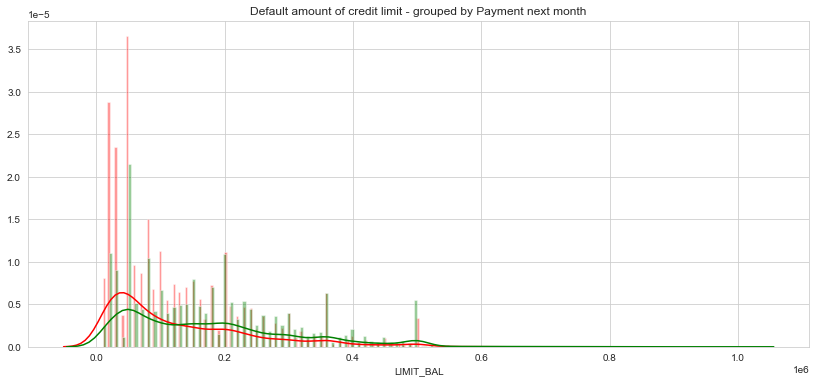

In [52]:
default_0 = df.loc[df['default'] == 0]['LIMIT_BAL']
default_1 = df.loc[df['default'] == 1]['LIMIT_BAL']
plt.figure(figsize = (14 , 6))
plt.title("Default amount of credit limit - grouped by Payment next month")
sns.set_color_codes("pastel")
sns.distplot(default_1 , kde=True, bins = 200 , color = 'red')
sns.distplot(default_0 , kde = True , bins = 200 , color = 'green')
plt.show()

# Observations :

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

In [25]:
# <a id = '7'>EDA<a/>

In [26]:
# <a id = '7'>EDA<a/>

In [27]:
# <a id = '7'>EDA<a/>

In [28]:
# <a id = '7'>EDA<a/>

In [29]:
# <a id = '7'>EDA<a/>

In [30]:
# <a id = '7'>EDA<a/>

In [31]:
# <a id = '7'>EDA<a/>

In [32]:
# <a id = '7'>EDA<a/>

In [33]:
# <a id = '7'>EDA<a/>

In [34]:
# <a id = '7'>EDA<a/>

In [35]:
# <a id = '7'>EDA<a/>

In [36]:
# <a id = '7'>EDA<a/>

In [37]:
# <a id = '7'>EDA<a/>

In [38]:
# <a id = '7'>EDA<a/>